🎯 Goal:<br>
Build a machine learning classification model using any dataset. Final model accuracy must be 85% or higher.<br>

✅ Steps to Follow:<br>

In [1]:
import pandas as pd
import numpy as np
import re

1. Choose a Dataset<br>

- Use any open-source dataset (e.g., from Kaggle or UCI).

- Must have a clear target/class column.

In [2]:
df = pd.read_csv('fake_job_postings.csv')
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [3]:
df_copy = df.copy()


2. Data Preprocessing

- Handle missing values and duplicates.

- Encode categorical variables.

- Scale numeric features.

In [4]:
df.columns.to_list()

['job_id',
 'title',
 'location',
 'department',
 'salary_range',
 'company_profile',
 'description',
 'requirements',
 'benefits',
 'telecommuting',
 'has_company_logo',
 'has_questions',
 'employment_type',
 'required_experience',
 'required_education',
 'industry',
 'function',
 'fraudulent']

In [5]:
df.nunique()

job_id                 17880
title                  11231
location                3105
department              1337
salary_range             874
company_profile         1709
description            14801
requirements           11967
benefits                6204
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
dtype: int64

In [6]:
df.shape

(17880, 18)

In [7]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [8]:
print('Missing percentenge:\n', ((df.isnull().sum()/len(df)) * 100).sort_values(ascending=False))

Missing percentenge:
 salary_range           83.959732
department             64.580537
required_education     45.329978
benefits               40.335570
required_experience    39.429530
function               36.101790
industry               27.421700
employment_type        19.412752
company_profile        18.501119
requirements           15.078300
location                1.935123
description             0.005593
title                   0.000000
job_id                  0.000000
telecommuting           0.000000
has_questions           0.000000
has_company_logo        0.000000
fraudulent              0.000000
dtype: float64


Drop columns that not impactful or maximum value Nan

In [9]:
# drop salary_range(≈84% missing value)
df.drop(columns=['salary_range'], inplace=True)

In [10]:
df

,job_id,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [11]:
df.drop(columns=['job_id'], inplace=True)

In [12]:
df

,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,Graphic Designer,"NG, LA, Lagos",NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [13]:
df.drop(columns=['department'], inplace=True)
df

,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,Payroll Accountant,"US, PA, Philadelphia",WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,Graphic Designer,"NG, LA, Lagos",NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


Drop rows

In [14]:
df['description'].isnull().sum()

np.int64(1)

In [15]:
df.dropna(subset=['description'], inplace=True)

In [16]:
df

,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,Payroll Accountant,"US, PA, Philadelphia",WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,Graphic Designer,"NG, LA, Lagos",NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [17]:
# Find all duplicates (including the first occurrence)
df[df.duplicated(keep=False)]

,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
45,Inside Sales Professional-Omaha,"US, NE, Omaha","ABC Supply Co., Inc. is the nation’s largest w...","As a Sales Representative, you will provide as...","As a Sales Representative, you must have the a...",Your benefits package as a Sales Representativ...,0,1,0,Full-time,NaN,NaN,Building Materials,Sales,0
62,English Teacher Abroad,"US, CA, Sacramento",We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,0,1,1,Contract,NaN,Bachelor's Degree,Education Management,NaN,0
83,Mail Processing Associate - General Clerk 1,"US, KY, London","Novitex Enterprise Solutions, formerly Pitney ...",We are currently seeking a General Clerk I. Th...,Required Qualifications:Minimum of 1 year cust...,NaN,0,1,0,Full-time,Entry level,High School or equivalent,Consumer Services,Customer Service,0
85,Research Associate,"US, CA, Newport Beach",Green Street Advisors is the industry leader i...,Green Street Advisors is the preeminent indepe...,In addition to a strongwork ethic and motivati...,Green Street Advisors is the preeminent indepe...,0,1,1,Full-time,Associate,Bachelor's Degree,Financial Services,Financial Analyst,0
102,Marketing Administrator,"GB, WAR, Coventry",Renewable Energy and Environmental Protection ...,The job is to support the growth of the #URL_9...,"Computer literateAble to work with HTML, altho...",For a suitably motivated and success orientate...,1,1,0,Full-time,Entry level,Bachelor's Degree,Internet,Marketing,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17591,Home Based Payroll Typist/Data Entry Clerks Po...,"US, MT, Absarokee",NaN,We have several openings available in this are...,"Basic computer and typing skills, ability to s...",All you need is access to the Internet and you...,0,0,0,NaN,NaN,NaN,NaN,NaN,1
17612,Urgent Jobs (Part Time Workers Needed),"AU, NSW, Sydney",NaN,Urgent Jobs (Part Time Workers Needed)You can ...,No any experience required.,NaN,0,0,0,Part-time,NaN,NaN,NaN,NaN,1
17620,Data Entry Admin/Clerical Positions - Work Fro...,"US, NE, Omaha",NaN,ACCEPTING ONLINE APPLICATIONS ONLYClick Here T...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,1
17742,Data Entry Admin/Clerical Positions - Work Fro...,"US, NE, Omaha",NaN,ACCEPTING ONLINE APPLICATIONS ONLYClick Here T...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,1


In [18]:
# Find all duplicates (including the first occurrence)
duplicates = df[df.duplicated(keep=False)]

# Sort so duplicates appear next to each other
duplicates = duplicates.sort_values(by=df.columns.tolist())

# Display them
duplicates

,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
6996,Account Executive,"US, CA, Irvine",HappyFox is a young startup that is all about ...,HappyFox is all about bringing the happiness q...,Ability to take deals to closureExcellent clar...,Competitive payCasual and high energy work env...,0,1,1,Full-time,Associate,Bachelor's Degree,Information Technology and Services,Sales,0
12360,Account Executive,"US, CA, Irvine",HappyFox is a young startup that is all about ...,HappyFox is all about bringing the happiness q...,Ability to take deals to closureExcellent clar...,Competitive payCasual and high energy work env...,0,1,1,Full-time,Associate,Bachelor's Degree,Information Technology and Services,Sales,0
4275,Account Manager,"US, NY, New York",We’re always looking for highly motivated “fou...,Responsibilities: Identify and maximize growth...,2+ years Sales or Client relationship experien...,"It’s no secret that we work hard, but we also ...",0,1,0,Full-time,Associate,NaN,Marketing and Advertising,NaN,0
8308,Account Manager,"US, NY, New York",We’re always looking for highly motivated “fou...,Responsibilities: Identify and maximize growth...,2+ years Sales or Client relationship experien...,"It’s no secret that we work hard, but we also ...",0,1,0,Full-time,Associate,NaN,Marketing and Advertising,NaN,0
1426,Accounts Administrator - Temporary Role,"NZ, ,",EROAD was established to modernise New Zealand...,Temporary Contract Available in our busy Finan...,In this position you will be involved in the f...,Gain exposure to a global organisation – whils...,0,1,0,Temporary,Associate,Unspecified,Information Technology and Services,Administrative,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14970,"[Raleigh, NC] Fundraising Consultant","US, NC, Raleigh",All American classics is a leading fundraising...,Position: Fundraising ConsultantLocation: Rale...,Must be able to work remotely.Must be self-dri...,Competitive Quarterly Bonus Structure Weekly ...,1,1,0,Full-time,Entry level,Unspecified,Fund-Raising,Sales,0
10321,"[Seattle, WA] Fundraising Consultant","US, WA, Seattle",All American classics is a leading fundraising...,Position: Fundraising ConsultantLocation: Seat...,Must be able to work remotely.Must be self-dri...,Competitive Quarterly Bonus Structure Weekly ...,1,1,0,Full-time,Entry level,Unspecified,Fund-Raising,Sales,0
11788,"[Seattle, WA] Fundraising Consultant","US, WA, Seattle",All American classics is a leading fundraising...,Position: Fundraising ConsultantLocation: Seat...,Must be able to work remotely.Must be self-dri...,Competitive Quarterly Bonus Structure Weekly ...,1,1,0,Full-time,Entry level,Unspecified,Fund-Raising,Sales,0
9283,iOS Developer,"US, NY, Brooklyn","Our team is made of designers, physics wizards...","Solve puzzles: big, small, and weirdWe’re on t...","You should have:A love of toys, games, puzzles...","What to expect:A collaborative, team-based app...",0,1,1,Full-time,Mid-Senior level,NaN,E-Learning,NaN,0


In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.shape

(17589, 15)

In [21]:
df.isnull().sum().sort_values(ascending=False)

required_education     8008
benefits               7106
required_experience    6961
function               6362
industry               4836
employment_type        3427
company_profile        3281
requirements           2647
location                341
title                     0
description               0
telecommuting             0
has_questions             0
has_company_logo          0
fraudulent                0
dtype: int64

In [22]:
df.nunique()

title                  11231
location                3105
company_profile         1709
description            14801
requirements           11967
benefits                6204
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
dtype: int64

In [23]:
def get_summary(df):
    summary = pd.DataFrame({
        'Unique Values': df.nunique(),
        'Missing Values': df.isnull().sum(),
        "Missing Percentage": (df.isnull().sum()/len(df))*100
    })
    print('shape: ',df.shape)
    return summary.sort_values(by=['Missing Values'], ascending=False)

    
get_summary(df)

shape:  (17589, 15)


,Unique Values,Missing Values,Missing Percentage
required_education,13,8008,45.528455
benefits,6204,7106,40.400250
required_experience,7,6961,39.575871
function,37,6362,36.170334
industry,131,4836,27.494457
employment_type,5,3427,19.483768
company_profile,1709,3281,18.653704
requirements,11967,2647,15.049178
location,3105,341,1.938712
title,11231,0,0.000000


In [24]:
df.drop(columns=['location'], inplace=True)
df

,title,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,Payroll Accountant,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,Project Cost Control Staff Engineer - Cost Con...,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,Graphic Designer,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [25]:
get_summary(df)

shape:  (17589, 14)


,Unique Values,Missing Values,Missing Percentage
required_education,13,8008,45.528455
benefits,6204,7106,40.400250
required_experience,7,6961,39.575871
function,37,6362,36.170334
industry,131,4836,27.494457
employment_type,5,3427,19.483768
company_profile,1709,3281,18.653704
requirements,11967,2647,15.049178
title,11231,0,0.000000
description,14801,0,0.000000


Devide categorical columns and text columns(with NaN)

In [26]:
cat_col = ['required_education','required_experience', 'function',
                 'employment_type',  'industry']
raw_text_col = ['benefits', 'company_profile', 'requirements']

In [27]:
df[cat_col] =df[cat_col].fillna('Unknown')
df[raw_text_col] = df[raw_text_col].fillna('')

In [28]:
get_summary(df)

shape:  (17589, 14)


,Unique Values,Missing Values,Missing Percentage
title,11231,0,0.0
company_profile,1710,0,0.0
description,14801,0,0.0
requirements,11968,0,0.0
benefits,6205,0,0.0
telecommuting,2,0,0.0
has_company_logo,2,0,0.0
has_questions,2,0,0.0
employment_type,6,0,0.0
required_experience,8,0,0.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17589 entries, 0 to 17879
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17589 non-null  object
 1   company_profile      17589 non-null  object
 2   description          17589 non-null  object
 3   requirements         17589 non-null  object
 4   benefits             17589 non-null  object
 5   telecommuting        17589 non-null  int64 
 6   has_company_logo     17589 non-null  int64 
 7   has_questions        17589 non-null  int64 
 8   employment_type      17589 non-null  object
 9   required_experience  17589 non-null  object
 10  required_education   17589 non-null  object
 11  industry             17589 non-null  object
 12  function             17589 non-null  object
 13  fraudulent           17589 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 2.0+ MB


In [30]:
df.describe(include='all')

,title,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
count,17589,17589,17589,17589,17589,17589.000000,17589.000000,17589.000000,17589,17589,17589,17589,17589,17589.000000
unique,11231,1710,14801,11968,6205,NaN,NaN,NaN,6,8,14,132,38,NaN
top,English Teacher Abroad,,"Play with kids, get paid for it Love travel? J...",,,NaN,NaN,NaN,Full-time,Unknown,Unknown,Unknown,Unknown,NaN
freq,309,3281,376,2647,7106,NaN,NaN,NaN,11414,6961,8008,4836,6362,NaN
mean,NaN,NaN,NaN,NaN,NaN,0.042697,0.794076,0.492012,NaN,NaN,NaN,NaN,NaN,0.048610
std,NaN,NaN,NaN,NaN,NaN,0.202179,0.404387,0.499950,NaN,NaN,NaN,NaN,NaN,0.215057
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000


In [31]:
df[cat_col[0]].value_counts()

required_education
Unknown                              8008
Bachelor's Degree                    5096
High School or equivalent            1987
Unspecified                          1366
Master's Degree                       416
Associate Degree                      263
Certification                         165
Some College Coursework Completed     100
Professional                           73
Vocational                             47
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: count, dtype: int64

In [32]:
df['required_education'] = df['required_education'].replace('Unknown', 'Unspecified')
df['required_education'].value_counts()

required_education
Unspecified                          9374
Bachelor's Degree                    5096
High School or equivalent            1987
Master's Degree                       416
Associate Degree                      263
Certification                         165
Some College Coursework Completed     100
Professional                           73
Vocational                             47
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: count, dtype: int64

In [33]:
df['required_experience'].value_counts()

required_experience
Unknown             6961
Mid-Senior level    3768
Entry level         2631
Associate           2265
Not Applicable      1070
Director             382
Internship           372
Executive            140
Name: count, dtype: int64

In [34]:
df['employment_type'].value_counts()

employment_type
Full-time    11414
Unknown       3427
Contract      1514
Part-time      772
Temporary      237
Other          225
Name: count, dtype: int64

Devide Ordinal and Nominal categorical Columns

In [35]:
ordinal_cat_col = ['required_education', 'required_experience']

In [36]:
df[ordinal_cat_col].describe(include='all')

,required_education,required_experience
count,17589,17589
unique,13,8
top,Unspecified,Unknown
freq,9374,6961


Label Encode Ordinal categorical columns

In [37]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [38]:
for col in ordinal_cat_col:
    df[col] = le.fit_transform(df[col])
    print(df[col].value_counts())

required_education
9     9374
1     5096
4     1987
5      416
0      263
2      165
7      100
6       73
10      47
8       27
3       26
12       9
11       6
Name: count, dtype: int64
required_experience
7    6961
5    3768
2    2631
0    2265
6    1070
1     382
4     372
3     140
Name: count, dtype: int64


Dummy Variable encode nominal column

In [39]:
nominal_cat_col = ['employment_type', 'function']

In [40]:
df = pd.get_dummies(df, columns=nominal_cat_col, drop_first=True)
df

,title,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,required_experience,required_education,...,function_Purchasing,function_Quality Assurance,function_Research,function_Sales,function_Science,function_Strategy/Planning,function_Supply Chain,function_Training,function_Unknown,function_Writing/Editing
0,Marketing Intern,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,4,9,...,False,False,False,False,False,False,False,False,False,False
1,Customer Service - Cloud Video Production,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,6,9,...,False,False,False,False,False,False,False,False,False,False
2,Commissioning Machinery Assistant (CMA),Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,7,9,...,False,False,False,False,False,False,False,False,True,False
3,Account Executive - Washington DC,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,5,1,...,False,False,False,True,False,False,False,False,False,False
4,Bill Review Manager,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,5,1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,5,9,...,False,False,False,True,False,False,False,False,False,False
17876,Payroll Accountant,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,5,1,...,False,False,False,False,False,False,False,False,False,False
17877,Project Cost Control Staff Engineer - Cost Con...,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,,0,0,0,7,9,...,False,False,False,False,False,False,False,False,True,False
17878,Graphic Designer,,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,6,6,...,False,False,False,False,False,False,False,False,False,False


In [41]:
df['industry'].describe()

count       17589
unique        132
top       Unknown
freq         4836
Name: industry, dtype: object

Frequency encode for nominal categorical column with high cardinality

In [42]:
freq_map = df['industry'].value_counts(normalize=True)  # normalize=True → proportion (0–1)
df['industry_encoded'] = df['industry'].map(freq_map)

In [43]:
df['industry'] = df['industry_encoded']
df.drop(columns=['industry_encoded'], inplace=True)

In [44]:
df['industry'].describe()

count    17589.000000
mean         0.103863
std          0.109175
min          0.000057
25%          0.009040
50%          0.059924
75%          0.274945
max          0.274945
Name: industry, dtype: float64

Handle text columns

In [45]:
raw_text_col

['benefits', 'company_profile', 'requirements']

In [46]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\G M RIFAT
[nltk_data]     REZA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
def clean_text(text):
    text = text.lower()                                   # lowercase
    text = re.sub(r'http\S+|www\S+', '', text)            # remove links
    text = re.sub(r'[^a-z\s]', '', text)                  # remove punctuation/numbers
    text = re.sub(r'\s+', ' ', text).strip()              # remove extra spaces
    words = [word for word in text.split() if word not in stop_words]
    return ' '.join(words)

In [48]:
text_cols = ['title', 'description'] + raw_text_col
text_cols

['title', 'description', 'benefits', 'company_profile', 'requirements']

In [49]:
get_summary(df[text_cols])

shape:  (17589, 5)


,Unique Values,Missing Values,Missing Percentage
title,11231,0,0.0
description,14801,0,0.0
benefits,6205,0,0.0
company_profile,1710,0,0.0
requirements,11968,0,0.0


In [50]:
for col in text_cols:
    df[col] = df[col].apply(clean_text)

In [51]:
df

,title,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,required_experience,required_education,...,function_Purchasing,function_Quality Assurance,function_Research,function_Sales,function_Science,function_Strategy/Planning,function_Supply Chain,function_Training,function_Unknown,function_Writing/Editing
0,marketing intern,food weve created groundbreaking awardwinning ...,food fastgrowing james beard awardwinning onli...,experience content management systems major pl...,,0,1,0,4,9,...,False,False,False,False,False,False,False,False,False,False
1,customer service cloud video production,seconds worlds cloud video production service ...,organised focused vibrant awesomedo passion cu...,expect youyour key responsibility communicate ...,get usthrough part seconds team gainexperience...,0,1,0,6,9,...,False,False,False,False,False,False,False,False,False,False
2,commissioning machinery assistant cma,valor services provides workforce solutions me...,client located houston actively seeking experi...,implement precommissioning commissioning proce...,,0,1,0,7,9,...,False,False,False,False,False,False,False,False,True,False
3,account executive washington dc,passion improving quality life geography heart...,company esri environmental systems research in...,education bachelors masters gis business admin...,culture anything corporatewe collaborative cre...,0,1,0,5,1,...,False,False,False,True,False,False,False,False,False,False
4,bill review manager,spotsource solutions llc global human capital ...,job title itemization review managerlocation f...,qualificationsrn license state texasdiploma ba...,full benefits offered,0,1,1,5,1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,account director distribution,vend looking awesome new talent come join us y...,case first time youve visited website vend awa...,ace role youwill eat comprehensive statements ...,expect uswe open culture openly share results ...,0,1,1,5,9,...,False,False,False,True,False,False,False,False,False,False
17876,payroll accountant,weblinc ecommerce platform services provider f...,payroll accountant focus primarily payroll fun...,ba bs accounting desire fun love genuine passi...,health amp wellnessmedical planprescription dr...,0,1,1,5,1,...,False,False,False,False,False,False,False,False,False,False
17877,project cost control staff engineer cost contr...,provide full time permanent positions many med...,experienced project cost control staff enginee...,least years professional experienceability wor...,,0,0,0,7,9,...,False,False,False,False,False,False,False,False,True,False
17878,graphic designer,,nemsia studios looking experienced visualgraph...,must fluent latest versions corel amp adobe cc...,competitive salary compensation based experien...,0,0,1,6,6,...,False,False,False,False,False,False,False,False,False,False


In [52]:
# Combine all text columns into one unified column
df['combined_text'] = df[text_cols].fillna('').agg(' '.join, axis=1)
df['combined_text']

0        marketing intern food fastgrowing james beard ...
1        customer service cloud video production organi...
2        commissioning machinery assistant cma client l...
3        account executive washington dc company esri e...
4        bill review manager job title itemization revi...
                               ...                        
17875    account director distribution case first time ...
17876    payroll accountant payroll accountant focus pr...
17877    project cost control staff engineer cost contr...
17878    graphic designer nemsia studios looking experi...
17879    web application developers wevend award winnin...
Name: combined_text, Length: 17589, dtype: object

In [53]:
df.drop(columns=text_cols, inplace=True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17589 entries, 0 to 17879
Data columns (total 50 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   telecommuting                    17589 non-null  int64  
 1   has_company_logo                 17589 non-null  int64  
 2   has_questions                    17589 non-null  int64  
 3   required_experience              17589 non-null  int64  
 4   required_education               17589 non-null  int64  
 5   industry                         17589 non-null  float64
 6   fraudulent                       17589 non-null  int64  
 7   employment_type_Full-time        17589 non-null  bool   
 8   employment_type_Other            17589 non-null  bool   
 9   employment_type_Part-time        17589 non-null  bool   
 10  employment_type_Temporary        17589 non-null  bool   
 11  employment_type_Unknown          17589 non-null  bool   
 12  function_Administrative

In [55]:
print(df['combined_text'].str.len().describe())

count    17589.000000
mean      2031.843652
std       1119.772077
min         26.000000
25%       1181.000000
50%       1931.000000
75%       2664.000000
max      11805.000000
Name: combined_text, dtype: float64


In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [57]:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000,
                        ngram_range=(1,2))

In [58]:
X_text = tfidf.fit_transform(df['combined_text'])

In [59]:
X_text.shape

(17589, 5000)

In [60]:
tfidf.get_feature_names_out()[:20]

array(['ab', 'abc', 'abc supply', 'abilities', 'ability', 'ability adapt',
       'ability build', 'ability communicate', 'ability effectively',
       'ability learn', 'ability manage', 'ability multitask',
       'ability prioritize', 'ability work', 'able', 'able demonstrate',
       'able multitask', 'able perform', 'able work', 'abroad'],
      dtype=object)

In [61]:
tfidf_df = pd.DataFrame(X_text.toarray(), columns=tfidf.get_feature_names_out())
tfidf_df.head()

,ab,abc,abc supply,abilities,ability,ability adapt,ability build,ability communicate,ability effectively,ability learn,...,youll working,young,young people,youre,youre looking,youth,youtube,youve,zealand,zero
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.030605,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.018319,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.104348
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000


In [62]:
X_other = df.drop(columns=['fraudulent', 'combined_text'])

In [63]:
X_other.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17589 entries, 0 to 17879
Data columns (total 48 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   telecommuting                    17589 non-null  int64  
 1   has_company_logo                 17589 non-null  int64  
 2   has_questions                    17589 non-null  int64  
 3   required_experience              17589 non-null  int64  
 4   required_education               17589 non-null  int64  
 5   industry                         17589 non-null  float64
 6   employment_type_Full-time        17589 non-null  bool   
 7   employment_type_Other            17589 non-null  bool   
 8   employment_type_Part-time        17589 non-null  bool   
 9   employment_type_Temporary        17589 non-null  bool   
 10  employment_type_Unknown          17589 non-null  bool   
 11  function_Administrative          17589 non-null  bool   
 12  function_Advertising   

In [64]:
type(X_text)

scipy.sparse._csr.csr_matrix

In [65]:
y = df['fraudulent']

In [66]:
X_other_fixed = X_other.replace({True: 1, False: 0})

C:\Users\G M RIFAT REZA\AppData\Local\Temp\ipykernel_21964\878811258.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_other_fixed = X_other.replace({True: 1, False: 0})


In [67]:
X_other_fixed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17589 entries, 0 to 17879
Data columns (total 48 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   telecommuting                    17589 non-null  int64  
 1   has_company_logo                 17589 non-null  int64  
 2   has_questions                    17589 non-null  int64  
 3   required_experience              17589 non-null  int64  
 4   required_education               17589 non-null  int64  
 5   industry                         17589 non-null  float64
 6   employment_type_Full-time        17589 non-null  int64  
 7   employment_type_Other            17589 non-null  int64  
 8   employment_type_Part-time        17589 non-null  int64  
 9   employment_type_Temporary        17589 non-null  int64  
 10  employment_type_Unknown          17589 non-null  int64  
 11  function_Administrative          17589 non-null  int64  
 12  function_Advertising   

In [68]:
print("Any non-numeric columns?", X_other_fixed.dtypes[X_other_fixed.dtypes == 'object'])

Any non-numeric columns? Series([], dtype: object)


In [69]:
from scipy.sparse import hstack, csr_matrix

X_final = hstack([
    X_text,
    csr_matrix(X_other_fixed.values)
])

In [70]:
X_final

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2786723 stored elements and shape (17589, 5048)>


3. Data Splitting

- Use train_test_split (e.g., 80/20 split).

- Optionally use KFold or StratifiedKFold.

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size = 0.2, random_state=42, stratify=y)

4. Visualization

- Plot class distribution, feature correlation, and basic feature plots using seaborn or matplotlib.

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\G M RIFAT REZA\AppData\Local\Temp\ipykernel_21964\367513880.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette='muted')
C:\Users\G M RIFAT REZA\AppData\Local\Temp\ipykernel_21964\367513880.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Real (0)', 'Fake (1)'])


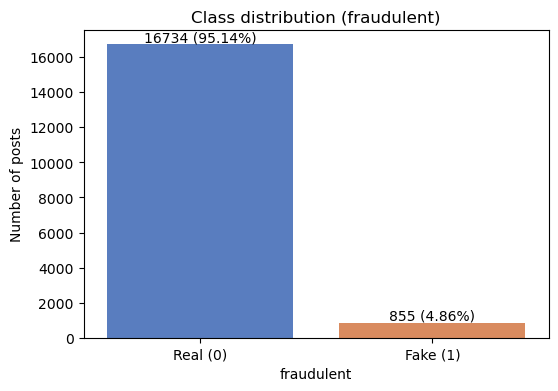

In [73]:
# counts and pct
counts = df['fraudulent'].value_counts().sort_index()
pct = (counts / counts.sum() * 100).round(2)

plt.figure(figsize=(6,4))
ax = sns.barplot(x=counts.index, y=counts.values, palette='muted')
for i, v in enumerate(counts.values):
    ax.text(i, v + counts.max()*0.01, f"{v} ({pct.iloc[i]}%)", ha='center')
ax.set_xticklabels(['Real (0)', 'Fake (1)'])
ax.set_title("Class distribution (fraudulent)")
ax.set_ylabel("Number of posts")
plt.show()

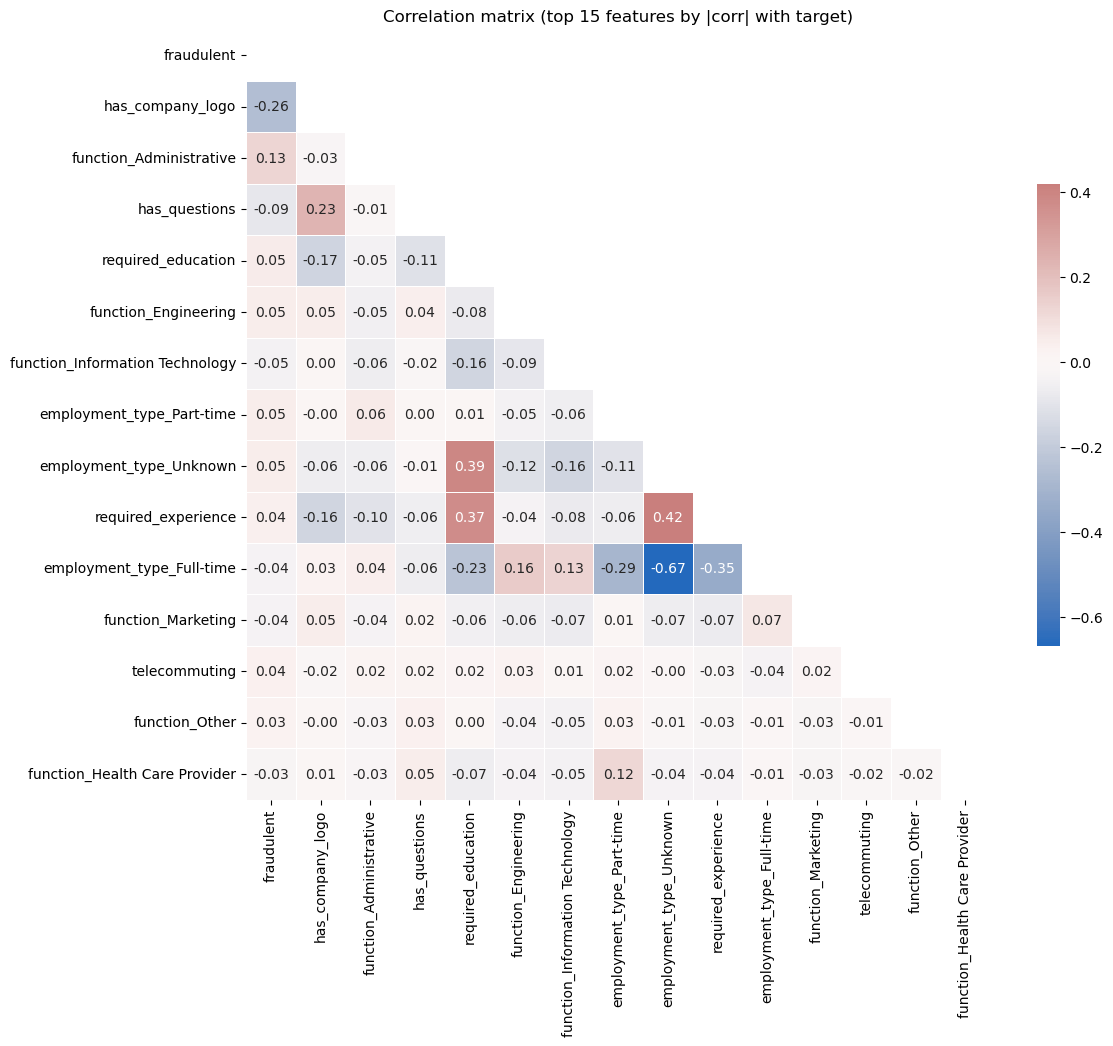

In [74]:
non_text = df.drop(columns=['combined_text'])
corr = non_text.corr()
top_n = 15
corr_with_target = corr['fraudulent'].abs().sort_values(ascending=False)
top_features = corr_with_target.head(top_n).index.tolist()

plt.figure(figsize=(12,10))
mask = np.triu(np.ones((len(top_features), len(top_features)), dtype=bool))
sns.heatmap(
    corr.loc[top_features, top_features],
    mask=mask,
    annot=True, fmt=".2f",
    cmap='vlag', center=0,
    linewidths=.5, cbar_kws={"shrink": .6}
)
plt.title(f"Correlation matrix (top {top_n} features by |corr| with target)")
plt.show()


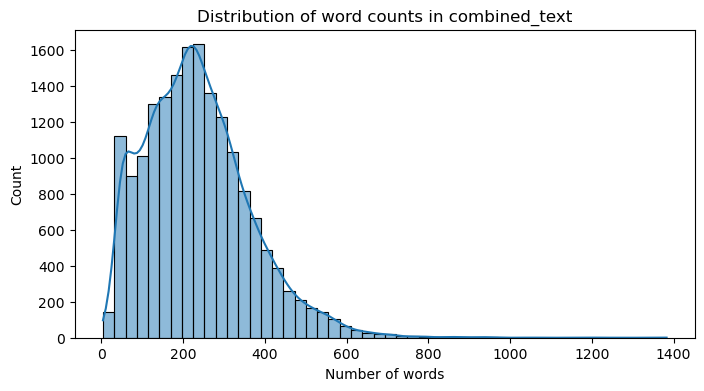

In [75]:
if 'word_count' not in df.columns:
    df['word_count'] = df['combined_text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8,4))
sns.histplot(df['word_count'], bins=50, kde=True)
plt.title("Distribution of word counts in combined_text")
plt.xlabel("Number of words")
plt.show()

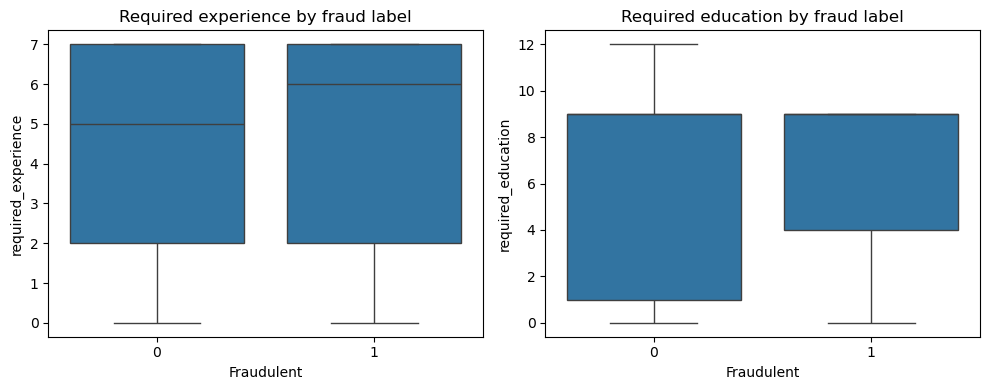

In [76]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x='fraudulent', y='required_experience', data=df)
plt.title('Required experience by fraud label')
plt.xlabel('Fraudulent')

plt.subplot(1,2,2)
sns.boxplot(x='fraudulent', y='required_education', data=df)
plt.title('Required education by fraud label')
plt.xlabel('Fraudulent')

plt.tight_layout()
plt.show()


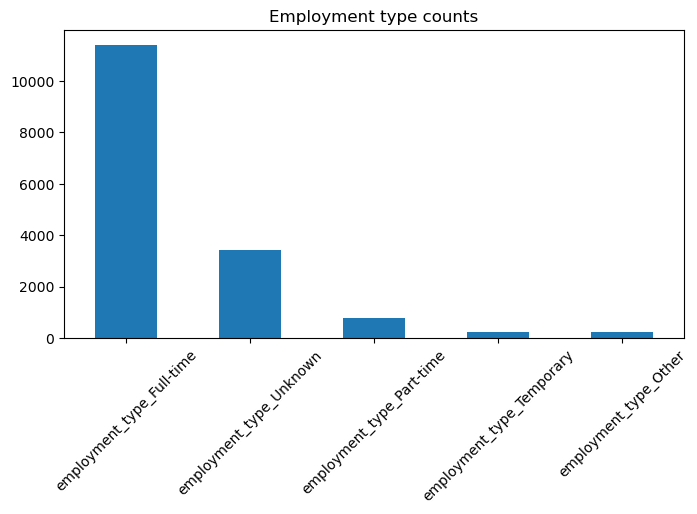

In [77]:
plt.figure(figsize=(8,4))
order = ['Full-time','Part-time','Contract','Temporary','Other','Unknown']
if 'employment_type' in df.columns:
    sns.countplot(x='employment_type', data=df, order=order)
else:
    emp_cols = [c for c in df.columns if c.startswith('employment_type_')]
    emp_counts = df[emp_cols].sum().sort_values(ascending=False)
    emp_counts.plot(kind='bar')
plt.title("Employment type counts")
plt.xticks(rotation=45)
plt.show()

5. Model Building

- Try at least 2 models (e.g., Logistic Regression, Decision 

- Tree, Random Forest, etc.).

- Train and evaluate using accuracy and confusion matrix.

Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'   # helpful for imbalanced classes
)

In [80]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=42)

In [81]:
y_pred = rf.predict(X_test)

In [82]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy*100:.2f}%\n")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Model Accuracy: 97.92%

Classification Report:
              precision    recall  f1-score   support

           0     0.9787    1.0000    0.9892      3347
           1     1.0000    0.5731    0.7286       171

    accuracy                         0.9792      3518
   macro avg     0.9893    0.7865    0.8589      3518
weighted avg     0.9797    0.9792    0.9765      3518

Confusion Matrix:
[[3347    0]
 [  73   98]]


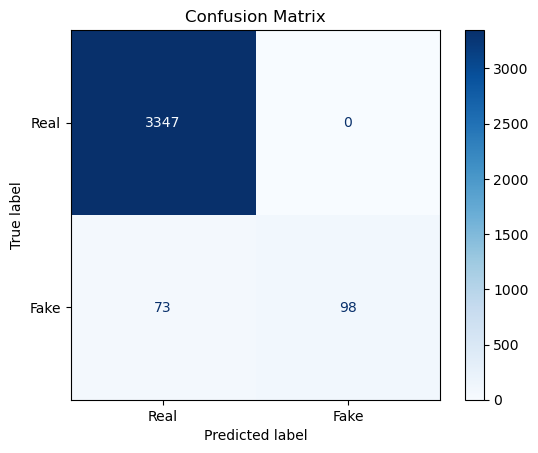

In [83]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Real','Fake'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
lr = LogisticRegression(
    solver='saga',        # works well with sparse input and supports l1/l2
    penalty='l2',         # regularization to avoid overfitting
    C=1.0,                # inverse regularization strength (default)
    max_iter=2000,        # increase iterations to ensure convergence
    class_weight='balanced', # handle class imbalance
    random_state=42,
    n_jobs=-1
)

In [86]:
lr.fit(X_train, y_train)

c:\Users\G M RIFAT REZA\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(class_weight='balanced', max_iter=2000, n_jobs=-1,
                   random_state=42, solver='saga')

In [87]:
lr.coef_.shape

(1, 5048)

In [88]:
y_pred = lr.predict(X_test)

In [89]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy*100:.2f}%\n")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Model Accuracy: 91.90%

Classification Report:
              precision    recall  f1-score   support

           0     0.9974    0.9172    0.9556      3347
           1     0.3705    0.9532    0.5336       171

    accuracy                         0.9190      3518
   macro avg     0.6839    0.9352    0.7446      3518
weighted avg     0.9669    0.9190    0.9351      3518

Confusion Matrix:
[[3070  277]
 [   8  163]]


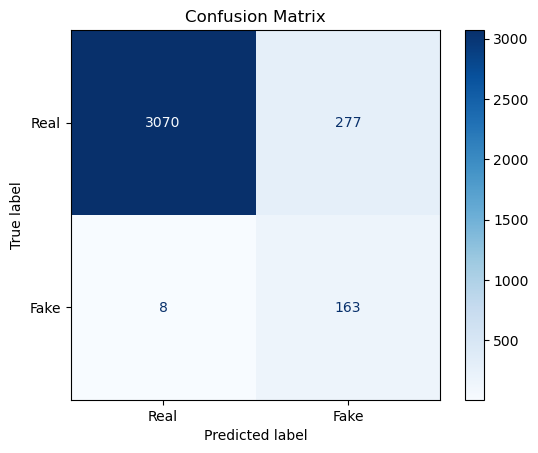

In [90]:
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Real','Fake'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

Decision Tree Classifier

In [91]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
dt = DecisionTreeClassifier(
    criterion='gini',     # how the tree measures split quality (Gini impurity)
    max_depth=None,       # tree expands until all leaves are pure (can overfit)
    min_samples_split=2,  # minimum samples needed to split a node
    random_state=42,
    class_weight='balanced'  # handle class imbalance
)

In [93]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [94]:
y_pred = dt.predict(X_test)

In [95]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy*100:.2f}%\n")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Model Accuracy: 96.76%

Classification Report:
              precision    recall  f1-score   support

           0     0.9859    0.9800    0.9829      3347
           1     0.6492    0.7251    0.6851       171

    accuracy                         0.9676      3518
   macro avg     0.8175    0.8526    0.8340      3518
weighted avg     0.9695    0.9676    0.9684      3518

Confusion Matrix:
[[3280   67]
 [  47  124]]


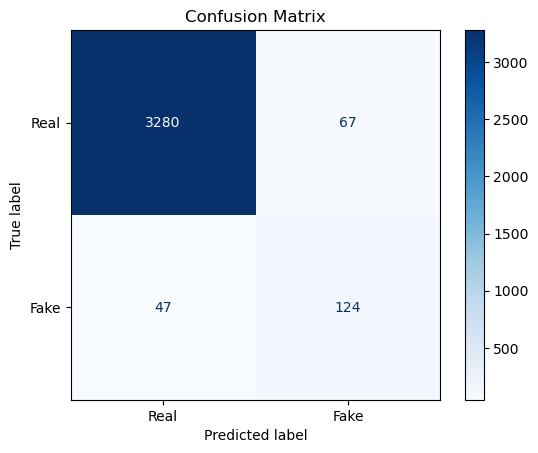

In [96]:
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Real','Fake'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

KNN

In [97]:
from sklearn.neighbors import KNeighborsClassifier

In [98]:
knn = KNeighborsClassifier(
    n_neighbors=5,      # number of nearest neighbors to vote
    weights='distance', # closer neighbors have stronger influence
    n_jobs=-1           # use all CPU cores
)

In [99]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, weights='distance')

In [100]:
y_pred = knn.predict(X_test)

In [101]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy*100:.2f}%\n")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Model Accuracy: 97.38%

Classification Report:
              precision    recall  f1-score   support

           0     0.9834    0.9892    0.9863      3347
           1     0.7616    0.6725    0.7143       171

    accuracy                         0.9738      3518
   macro avg     0.8725    0.8309    0.8503      3518
weighted avg     0.9726    0.9738    0.9731      3518

Confusion Matrix:
[[3311   36]
 [  56  115]]


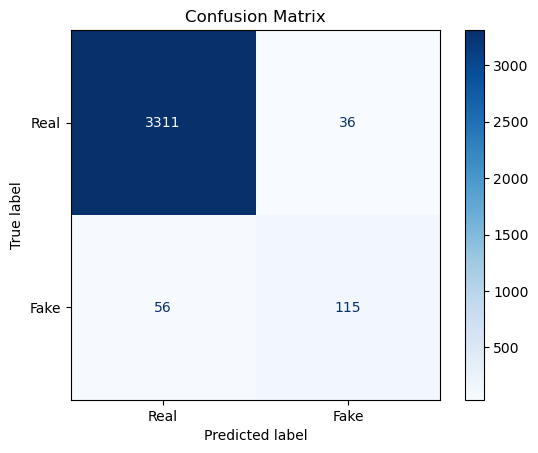

In [102]:
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Real','Fake'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

Naive Bayes

In [103]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB(alpha=1.0)

In [104]:
nb.fit(X_train, y_train)

MultinomialNB()

In [105]:
y_pred = nb.predict(X_test)

In [106]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy*100:.2f}%\n")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Model Accuracy: 96.36%

Classification Report:
              precision    recall  f1-score   support

           0     0.9683    0.9943    0.9811      3347
           1     0.7654    0.3626    0.4921       171

    accuracy                         0.9636      3518
   macro avg     0.8669    0.6784    0.7366      3518
weighted avg     0.9584    0.9636    0.9574      3518

Confusion Matrix:
[[3328   19]
 [ 109   62]]


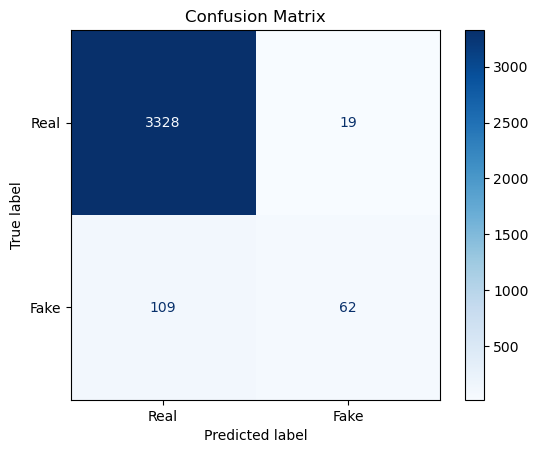

In [107]:
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Real','Fake'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


6. Target

- Achieve ≥ 85% accuracy on test data.

- Use hyperparameter tuning if needed.

All of the model accuracy is > 90 <br>
Hyperparameter are tuned


📁 Submission
- Submit only a .ipynb file (Jupyter Notebook) with all code, outputs, and plots.

I- nclude the dataset (CSV or XLSX format) used in the same folder.